Forecasting!! -360DIGITMG

Forecasting is the process of making predictions of the future based on past and present data and analysis of trends.Trending or predicting a continuation based on the shape of the line generated by plotting past results.

Forecasting problem 2. The dataset consists of quarterly sales data of Coca-Cola from 1986 to 1996. Predict sales for the next two years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model. 

Business objective: Forecast the future sales of cocacola for ever quater

In [34]:
import pandas as pd                      # for Data Manipulation
import numpy as np                       # for Mathematical calculations
import matplotlib.pyplot as plt          # for Data Visualization

In [35]:
cocacola = pd.read_excel("D:/Datascience/Assignment/27.Forecasting - Time Series/CocaCola_Sales_Rawdata.xlsx")
quaters = ['Q1','Q2','Q3','Q4']

In [36]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [37]:
for i in range(42):                 #Filling elements in column "Quarter" with first two letters of column "Quarter"
    p = cocacola['Quarter'][i]
    cocacola['Quarter'][i] = p[0:2]

<ipython-input-37-e52444c0b753>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Quarter'][i] = p[0:2]


In [39]:
qtr_dummies = pd.get_dummies(cocacola["Quarter"]) # creating dummies for "Quarter" column
cola = pd.concat([cocacola,qtr_dummies],axis=1) # concating cocacola dataframe and qtr_dummies, creating newdataframe cola


In [40]:
cola['t'] = np.arange(1,43)                            # creating new column t 
cola['t_squared'] = cola['t']*cola['t']                # crearing new column "t_squared" by squaring elements of "t" column 
cola['log_sales'] = np.log(cola['Sales'])              # creating new column "log_pas" by taking log on "passenger" column elements

<AxesSubplot:>

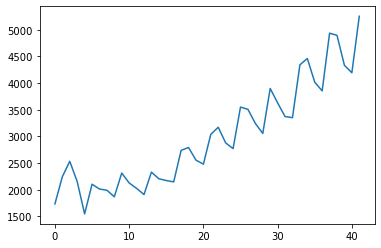

In [10]:
cola.Sales.plot()

In [41]:
#spliting the data into train and test by consider last 4 quarters as test data
Train = cola.head(38)
Test = cola.tail(4)

In [11]:
# linear
import statsmodels.formula.api as smf 
lr_ml = smf.ols('Sales~t',data=Train).fit()
pred_lr =  pd.Series(lr_ml.predict(Test['t']))
rmse_lr = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_lr))**2))
rmse_lr

591.5532957223963

In [12]:
# Quadratic
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad#475.56

475.56183518315095

In [13]:
# Exponential
Expo = smf.ols('log_sales~t',data=Train).fit()
pred_Expo = pd.Series(Expo.predict(pd.DataFrame(Test['t'])))
rmse_Expo = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Expo)))**2))
rmse_Expo

466.24797310672346

In [14]:
# Additive seasonality
add_sea = smf.ols('Sales~Q4+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q4','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547264

In [15]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Q4+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q4','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719349373

In [16]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q4+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Q4','Q2','Q3']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.389640077962

In [17]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_sales~t+Q4+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.5243904982048

In [18]:
# Comparing all model rmse values
data = {"MODEL":pd.Series(["rmse_lr","rmse_Expo","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_lr,rmse_Expo,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_lr,591.553296
1,rmse_Expo,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_add_sea_quad,301.738007
5,rmse_Mult_sea,1963.389640
6,rmse_Mult_add_sea,225.524390


In [51]:
# predicting sales using model which is having small rmse value
predict_data = pd.read_csv("D:/Datascience/Assignment/27.Forecasting - Time Series/Predict_coca1.csv")
model_full = smf.ols('log_sales~t+Q4+Q2+Q3',data=cola).fit()
pred_full=model_full.predict(cola)
cola["pred_full"]=pred_full

In [61]:
residuals=pd.DataFrame(np.array(cola["Sales"]-np.array(pred_full)))
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new = np.exp(pred_new)
pred_new

0    5105.188052
1    4712.333489
2    4458.542939
3    5670.883819
4    5623.339925
5    5190.612526
6    4911.063463
7    6246.451074
8    6194.081705
9    5717.434570
dtype: float64

In [62]:
predict_data["forecasted_sales"] = pred_new

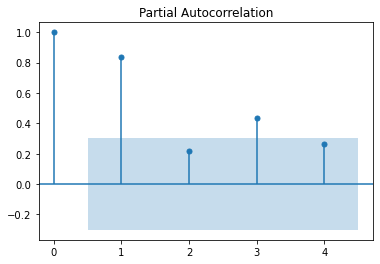

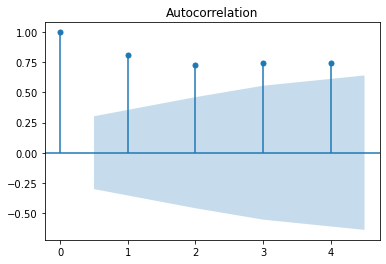

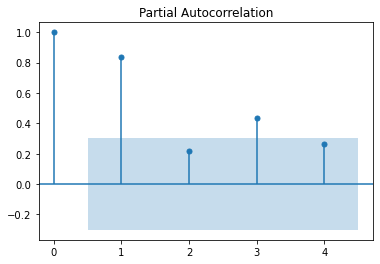

In [63]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=4)
sm.graphics.tsa.plot_pacf(cola.Sales.values.squeeze(), lags=4)

In [64]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
pas=cocacola["Sales"]

In [65]:
# predicting sales of cocacola using ARIMA model
model=ARIMA(residuals,order=(1,0,0)).fit(transparams=True)
forecasterrors=model.forecast(steps=4)[0]
predict_data["forecasted_sales"] = pd.Series(pred_new)
predict_data["forecasted_errors"] = pd.Series(forecasterrors)
predict_data["improved"] = predict_data["forecasted_sales"]+predict_data["forecasted_errors"]

C:\Users\Naveen\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:>

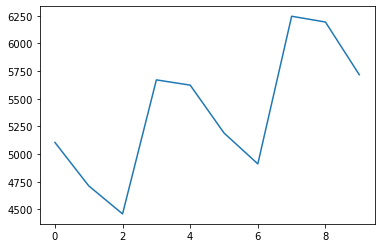

In [66]:
predict_data["forecasted_sales"].plot()     #plotting the forecasted sales of cocacola per quater